# RCNN

The R-CNN first extracts many (e.g., 2000) region proposals from the input image (e.g., anchor boxes can also be considered as region proposals), labeling their classes and bounding boxes (e.g., offsets).

(Girshick et al., 2014)

Then a CNN is used to perform forward propagation on each region proposal to extract its features. Next, features of each region proposal are used for predicting the class and bounding box of this region proposal.

r-cnn.svg

The R-CNN consists of the following four steps:

* Perform selective search to extract multiple high-quality region proposals on the input image (Uijlings et al., 2013). These proposed regions are usually selected at multiple scales with different shapes and sizes. Each region proposal will be labeled with a class and a ground-truth bounding box.

* Choose a pretrained CNN and truncate it before the output layer. Resize each region proposal to the input size required by the network, and output the extracted features for the region proposal through forward propagation.

* Take the extracted features and labeled class of each region proposal as an example. Train multiple support vector machines to classify objects, where each support vector machine individually determines whether the example contains a specific class.

* Take the extracted features and labeled bounding box of each region proposal as an example. Train a linear regression model to predict the ground-truth bounding box.

Although the R-CNN model uses pretrained CNNs to effectively extract image features, it is slow. Imagine that we select thousands of region proposals from a single input image: this requires thousands of CNN forward propagations to perform object detection. This massive computing load makes it infeasible to widely use R-CNNs in real-world applications.

# Fast RCNN

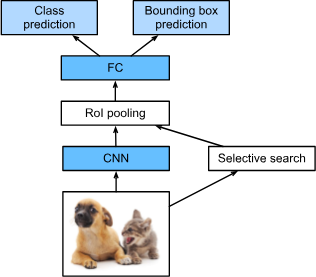

The approach is similar to the R-CNN algorithm. But, instead of feeding the region proposals to the CNN, we feed the input image to the CNN to generate a convolutional feature map. From the convolutional feature map, we identify the region of proposals and warp them into squares and by using a RoI pooling layer we reshape them into a fixed size so that it can be fed into a fully connected layer. From the RoI feature vector, we use a softmax layer to predict the class of the proposed region and also the offset values for the bounding box.

The reason “Fast R-CNN” is faster than R-CNN is because you don’t have to feed 2000 region proposals to the convolutional neural network every time. Instead, the convolution operation is done only once per image and a feature map is generated from it.

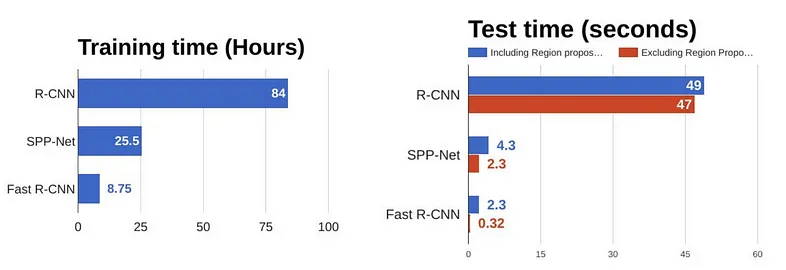

# Faster RCNN

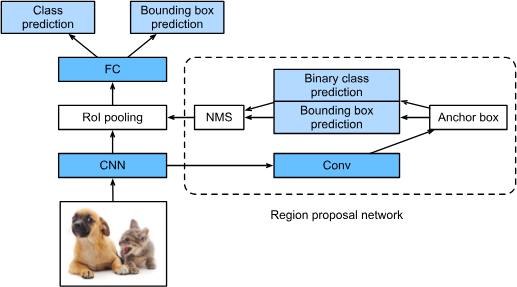

Both of the above algorithms(R-CNN & Fast R-CNN) uses selective search to find out the region proposals. Selective search is a slow and time-consuming process affecting the performance of the network. Therefore, Shaoqing Ren et al. came up with an object detection algorithm that eliminates the selective search algorithm and lets the network learn the region proposals.

Similar to Fast R-CNN, the image is provided as an input to a convolutional network which provides a convolutional feature map. Instead of using selective search algorithm on the feature map to identify the region proposals, a separate network is used to predict the region proposals. The predicted region proposals are then reshaped using a RoI pooling layer which is then used to classify the image within the proposed region and predict the offset values for the bounding boxes.

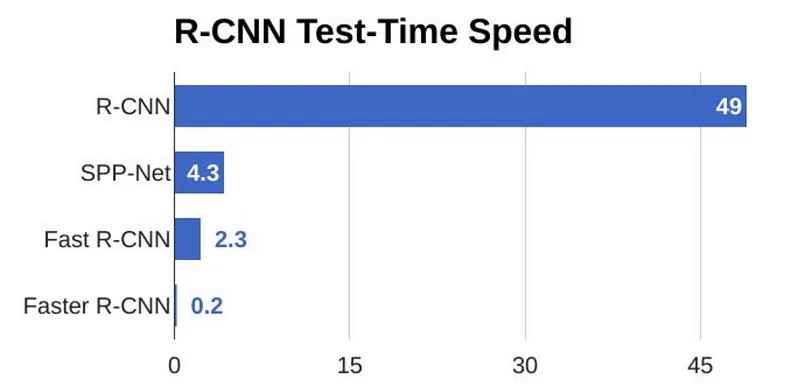

# Mask RCNN

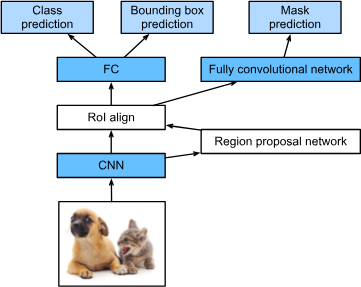

The mask R-CNN is modified based on the faster R-CNN. Specifically, the mask R-CNN replaces the region of interest pooling layer with the region of interest (RoI) alignment layer. This region of interest alignment layer uses bilinear interpolation to preserve the spatial information on the feature maps, which is more suitable for pixel-level prediction. The output of this layer contains feature maps of the same shape for all the regions of interest. They are used to predict not only the class and bounding box for each region of interest, but also the pixel-level position of the object through an additional fully convolutional network.

# YOLO

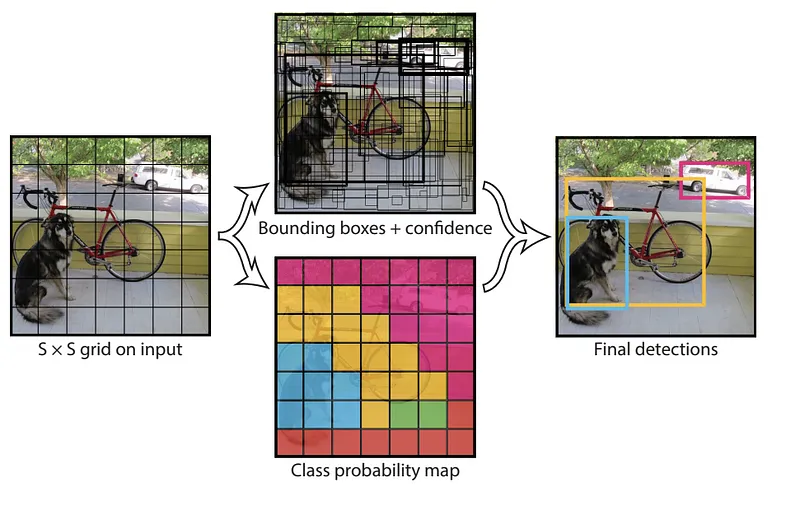

How YOLO works is that we take an image and split it into an SxS grid, within each of the grid we take m bounding boxes. For each of the bounding box, the network outputs a class probability and offset values for the bounding box. The bounding boxes having the class probability above a threshold value is selected and used to locate the object within the image.

YOLO is orders of magnitude faster(45 frames per second) than other object detection algorithms. The limitation of YOLO algorithm is that it struggles with small objects within the image, for example it might have difficulties in detecting a flock of birds. This is due to the spatial constraints of the algorithm.

In [ ]:
!nvidia-smi

Sat Nov  4 14:27:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.2MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100%|██████████| 104k/104k [00:00<00:00, 47.1MB/s]


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("karel-cornelis-q2qqg").project("aicook-lcv4d")
dataset = project.version(4).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to aicook-4 in yolov8:: 100%|██████████| 6112/6112 [00:01<00:00, 3547.92it/s]


In [ ]:
!cat {dataset.location}/data.yaml

names:
- apple
- banana
- beef
- blueberries
- bread
- butter
- carrot
- cheese
- chicken
- chicken_breast
- chocolate
- corn
- eggs
- flour
- goat_cheese
- green_beans
- ground_beef
- ham
- heavy_cream
- lime
- milk
- mushrooms
- onion
- potato
- shrimp
- spinach
- strawberries
- sugar
- sweet_potato
- tomato
nc: 30
roboflow:
  license: MIT
  project: aicook-lcv4d
  url: https://universe.roboflow.com/karel-cornelis-q2qqg/aicook-lcv4d/dataset/4
  version: 4
  workspace: karel-cornelis-q2qqg
test: ../test/images
train: aicook-4/train/images
val: aicook-4/valid/images


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data=datasets/aicook-4/data.yaml epochs=25 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=datasets/aicook-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify

In [ ]:
!ls {HOME}/runs/detect/train7/

args.yaml					    results.png		   val_batch0_pred.jpg
confusion_matrix.png				    train_batch0.jpg	   val_batch1_labels.jpg
events.out.tfevents.1699109116.6ca660b877a5.5362.0  train_batch1.jpg	   val_batch1_pred.jpg
F1_curve.png					    train_batch2715.jpg    val_batch2_labels.jpg
P_curve.png					    train_batch2716.jpg    val_batch2_pred.jpg
PR_curve.png					    train_batch2717.jpg    weights
R_curve.png					    train_batch2.jpg
results.csv					    val_batch0_labels.jpg


/content


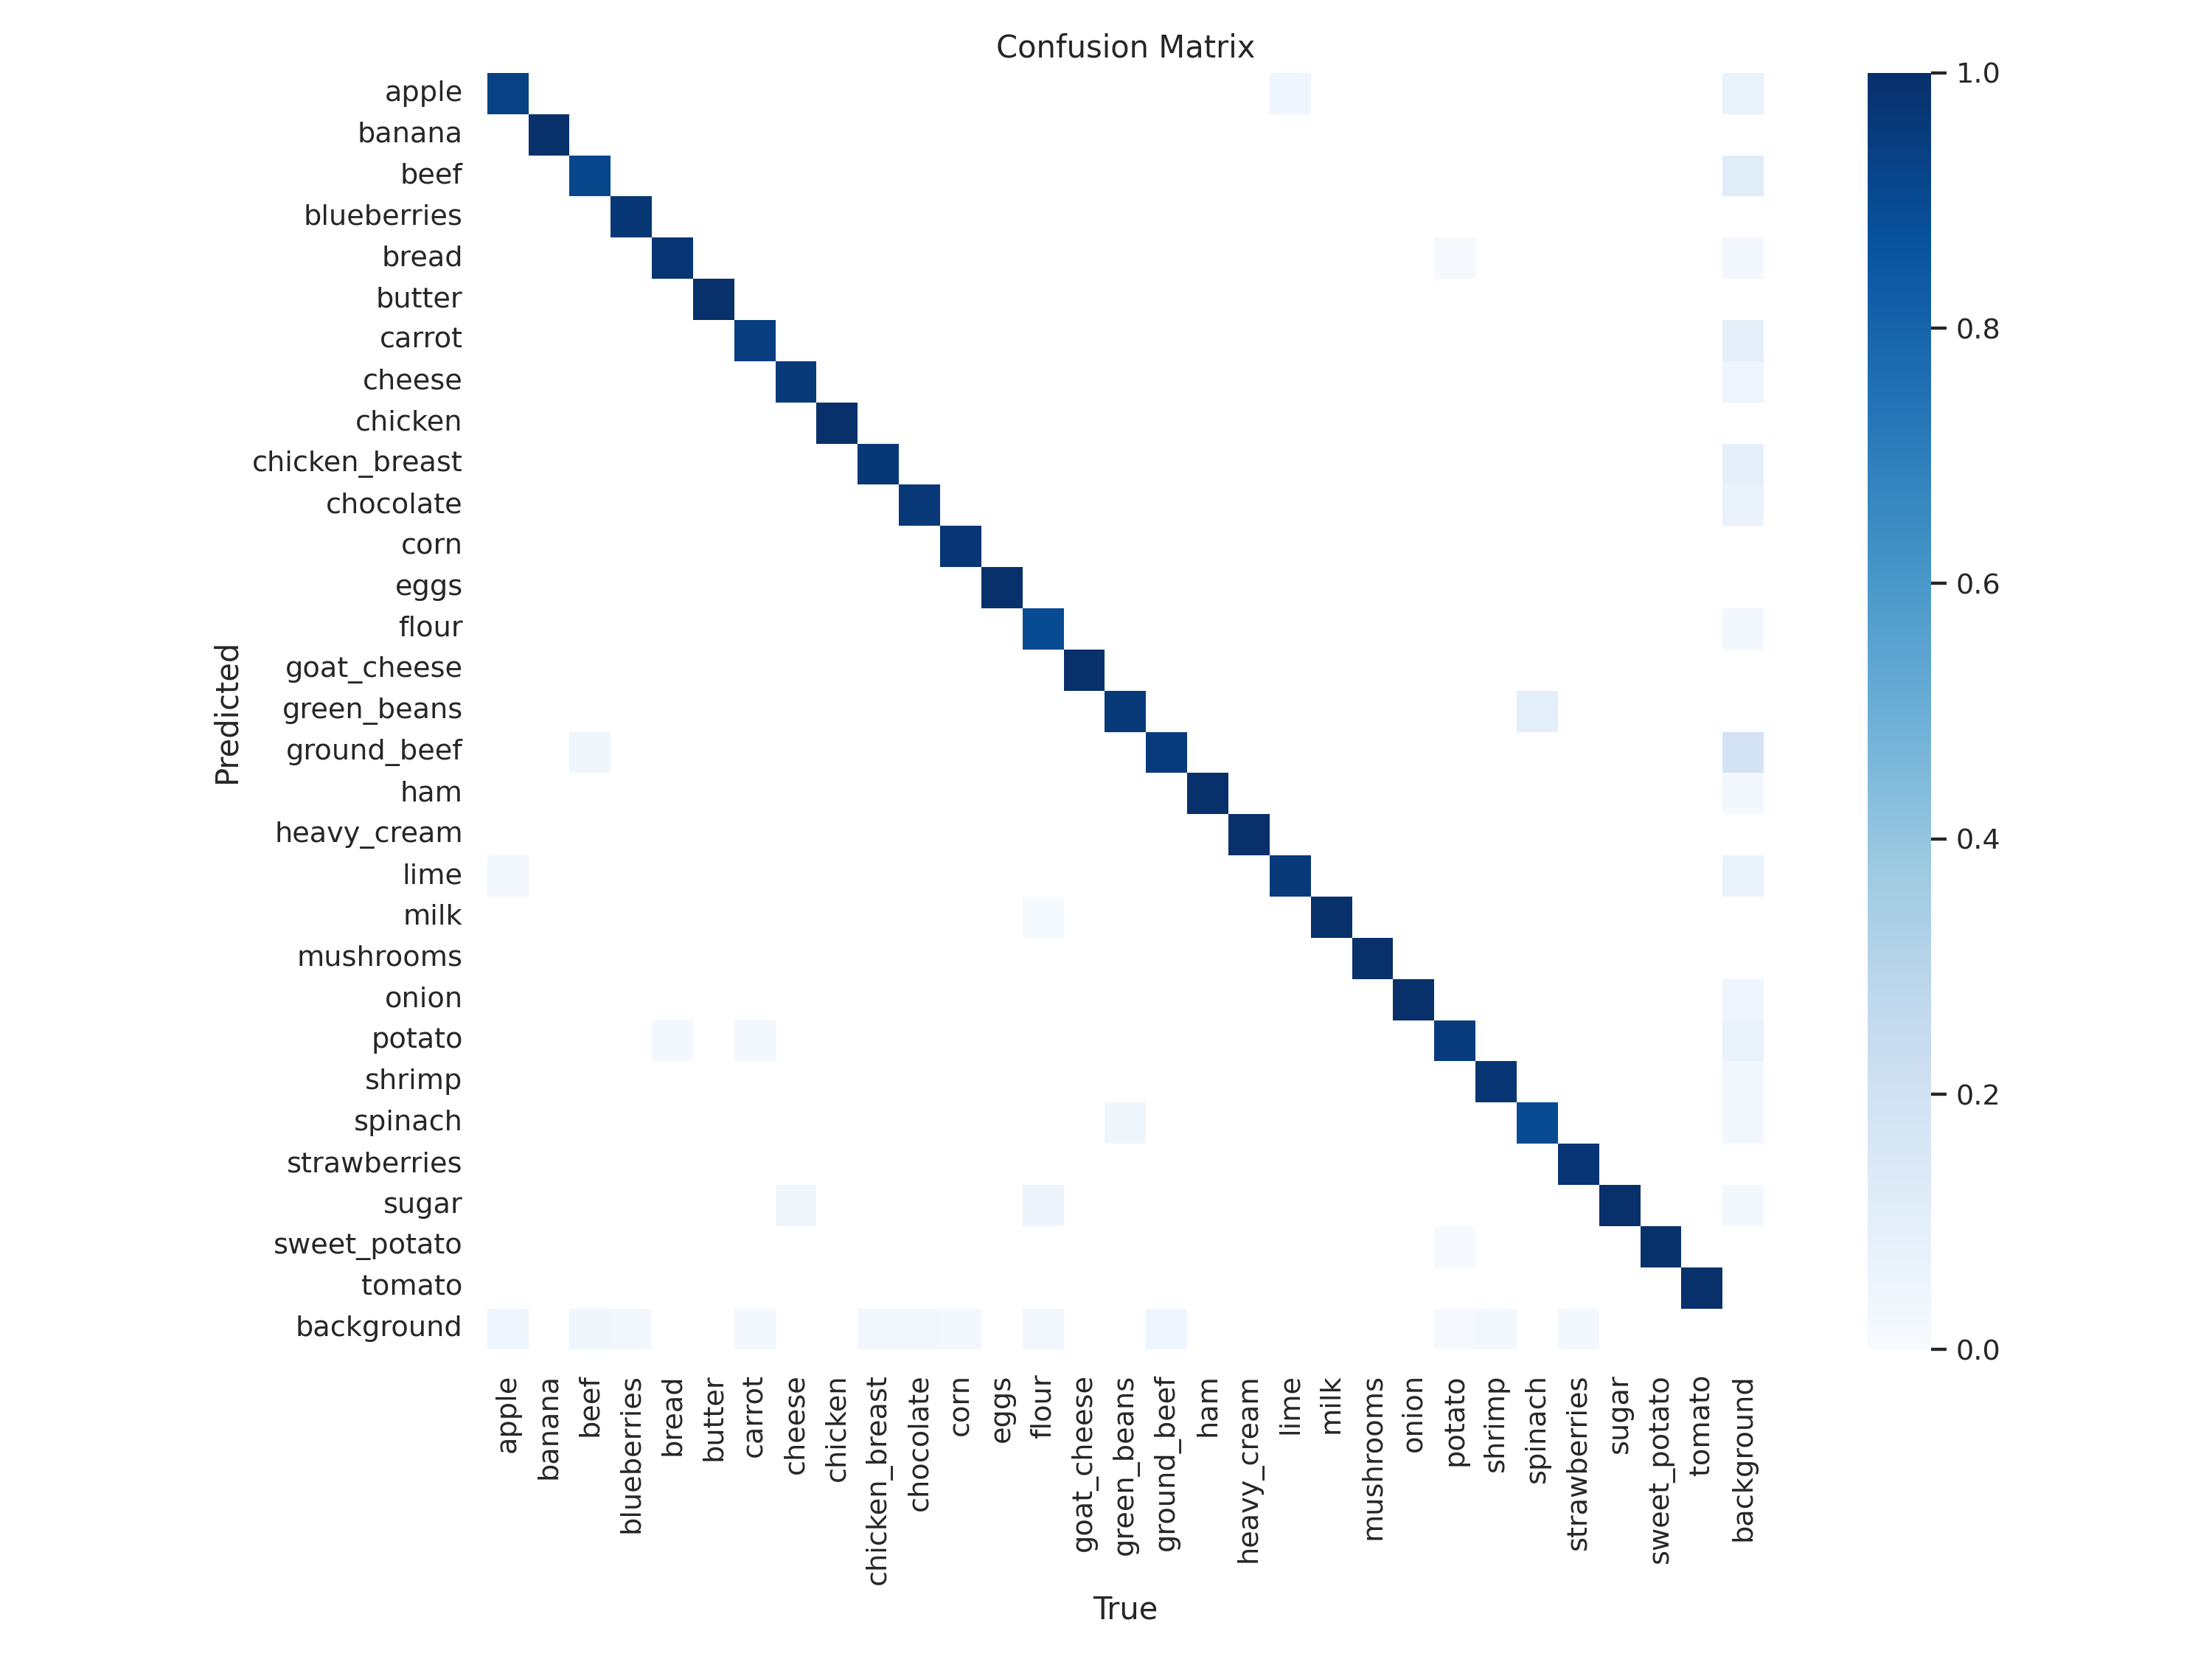

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=1200)

/content


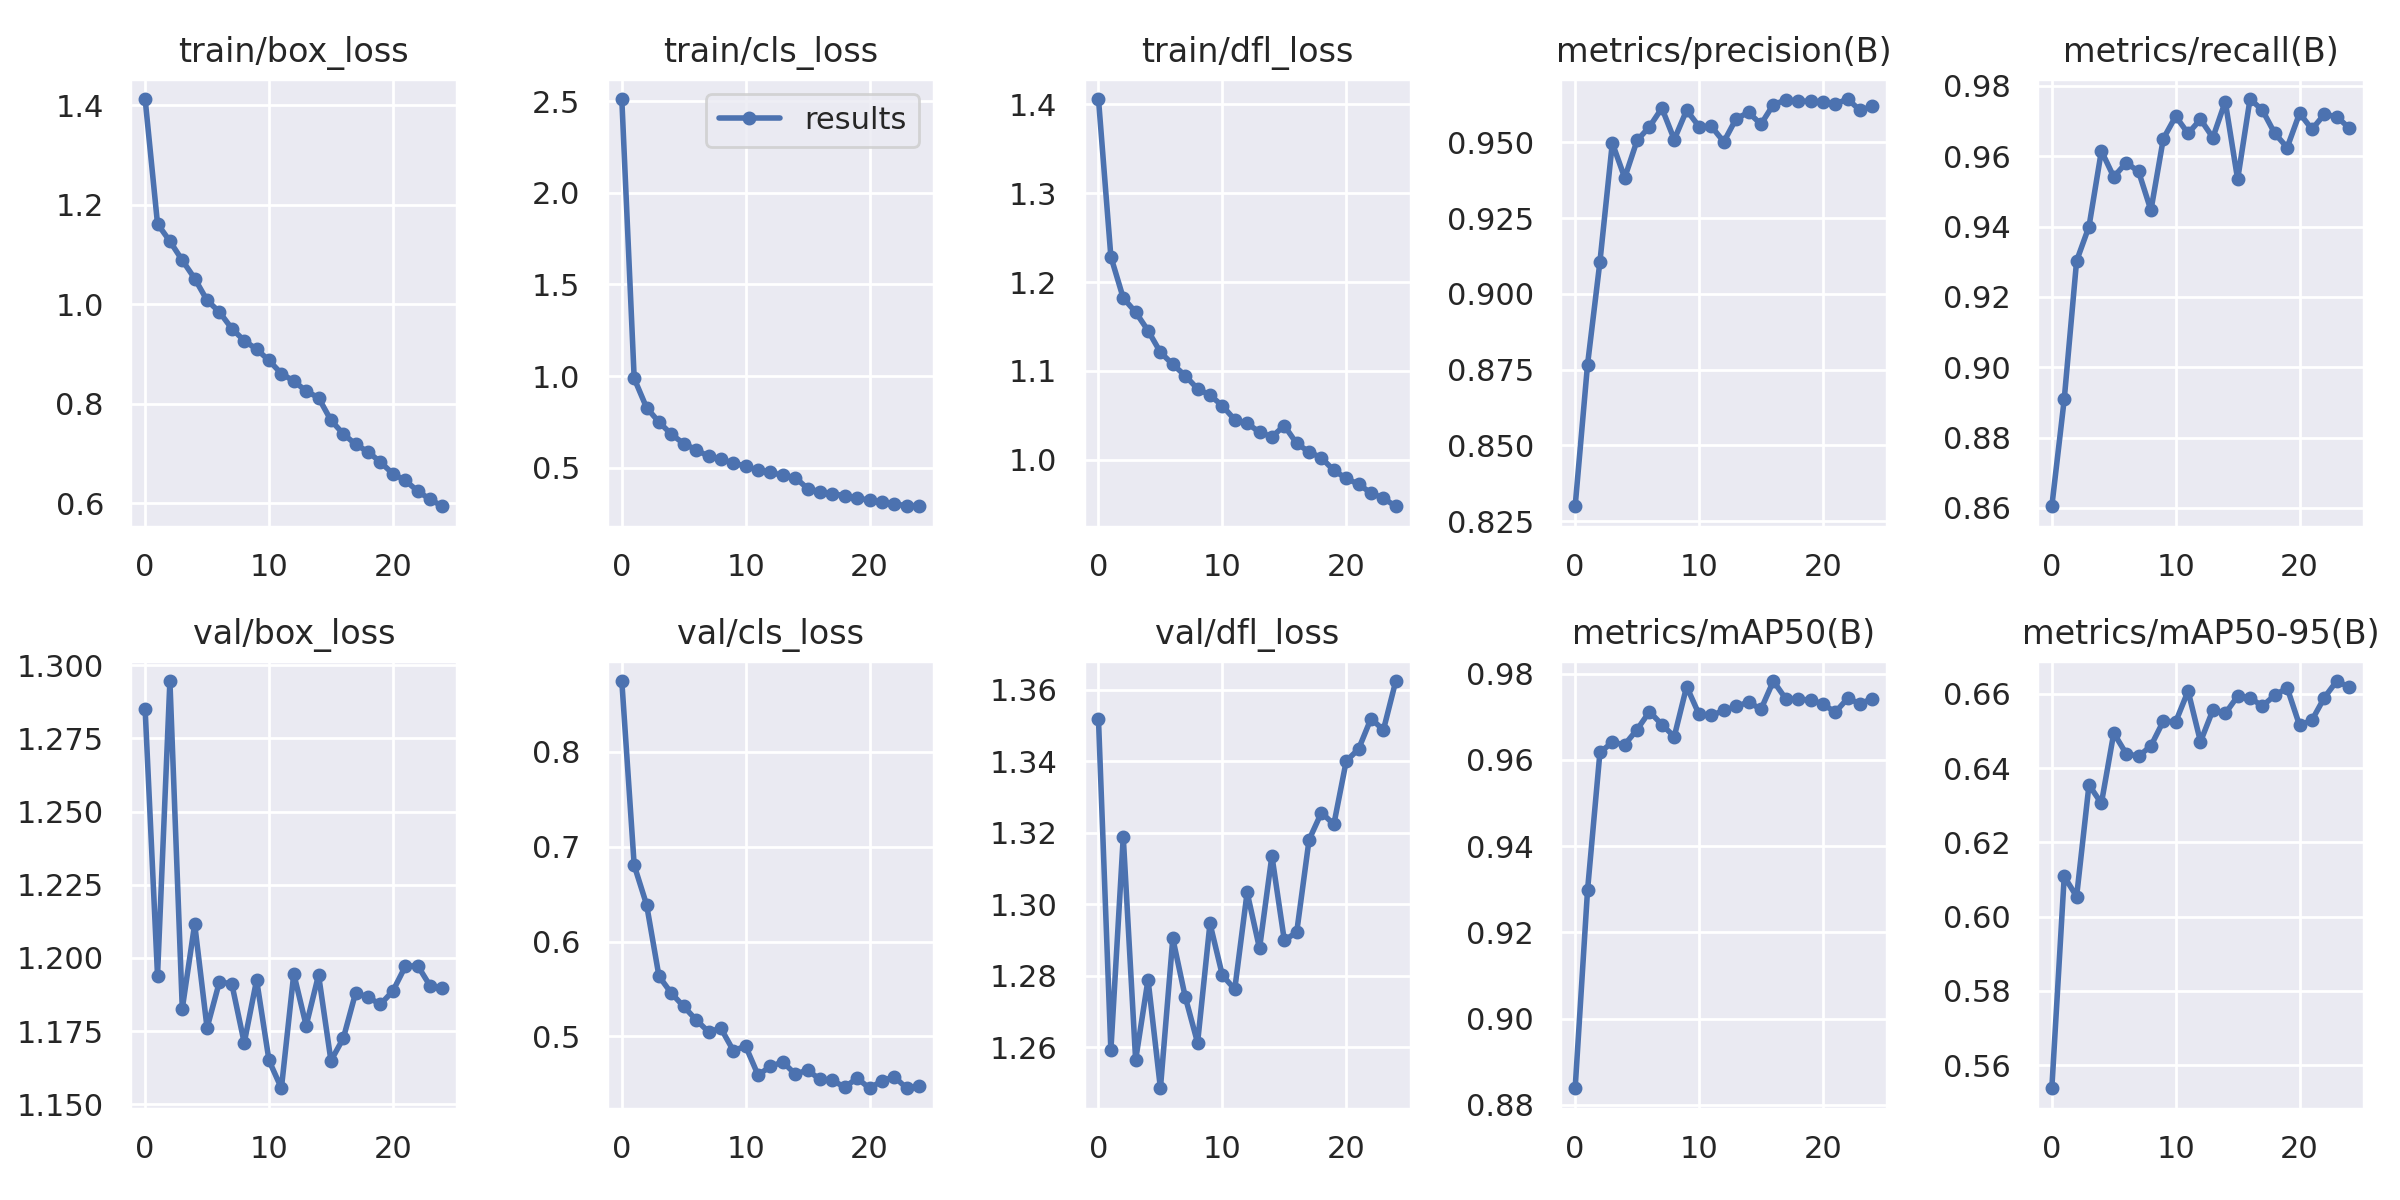

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=1200)

/content


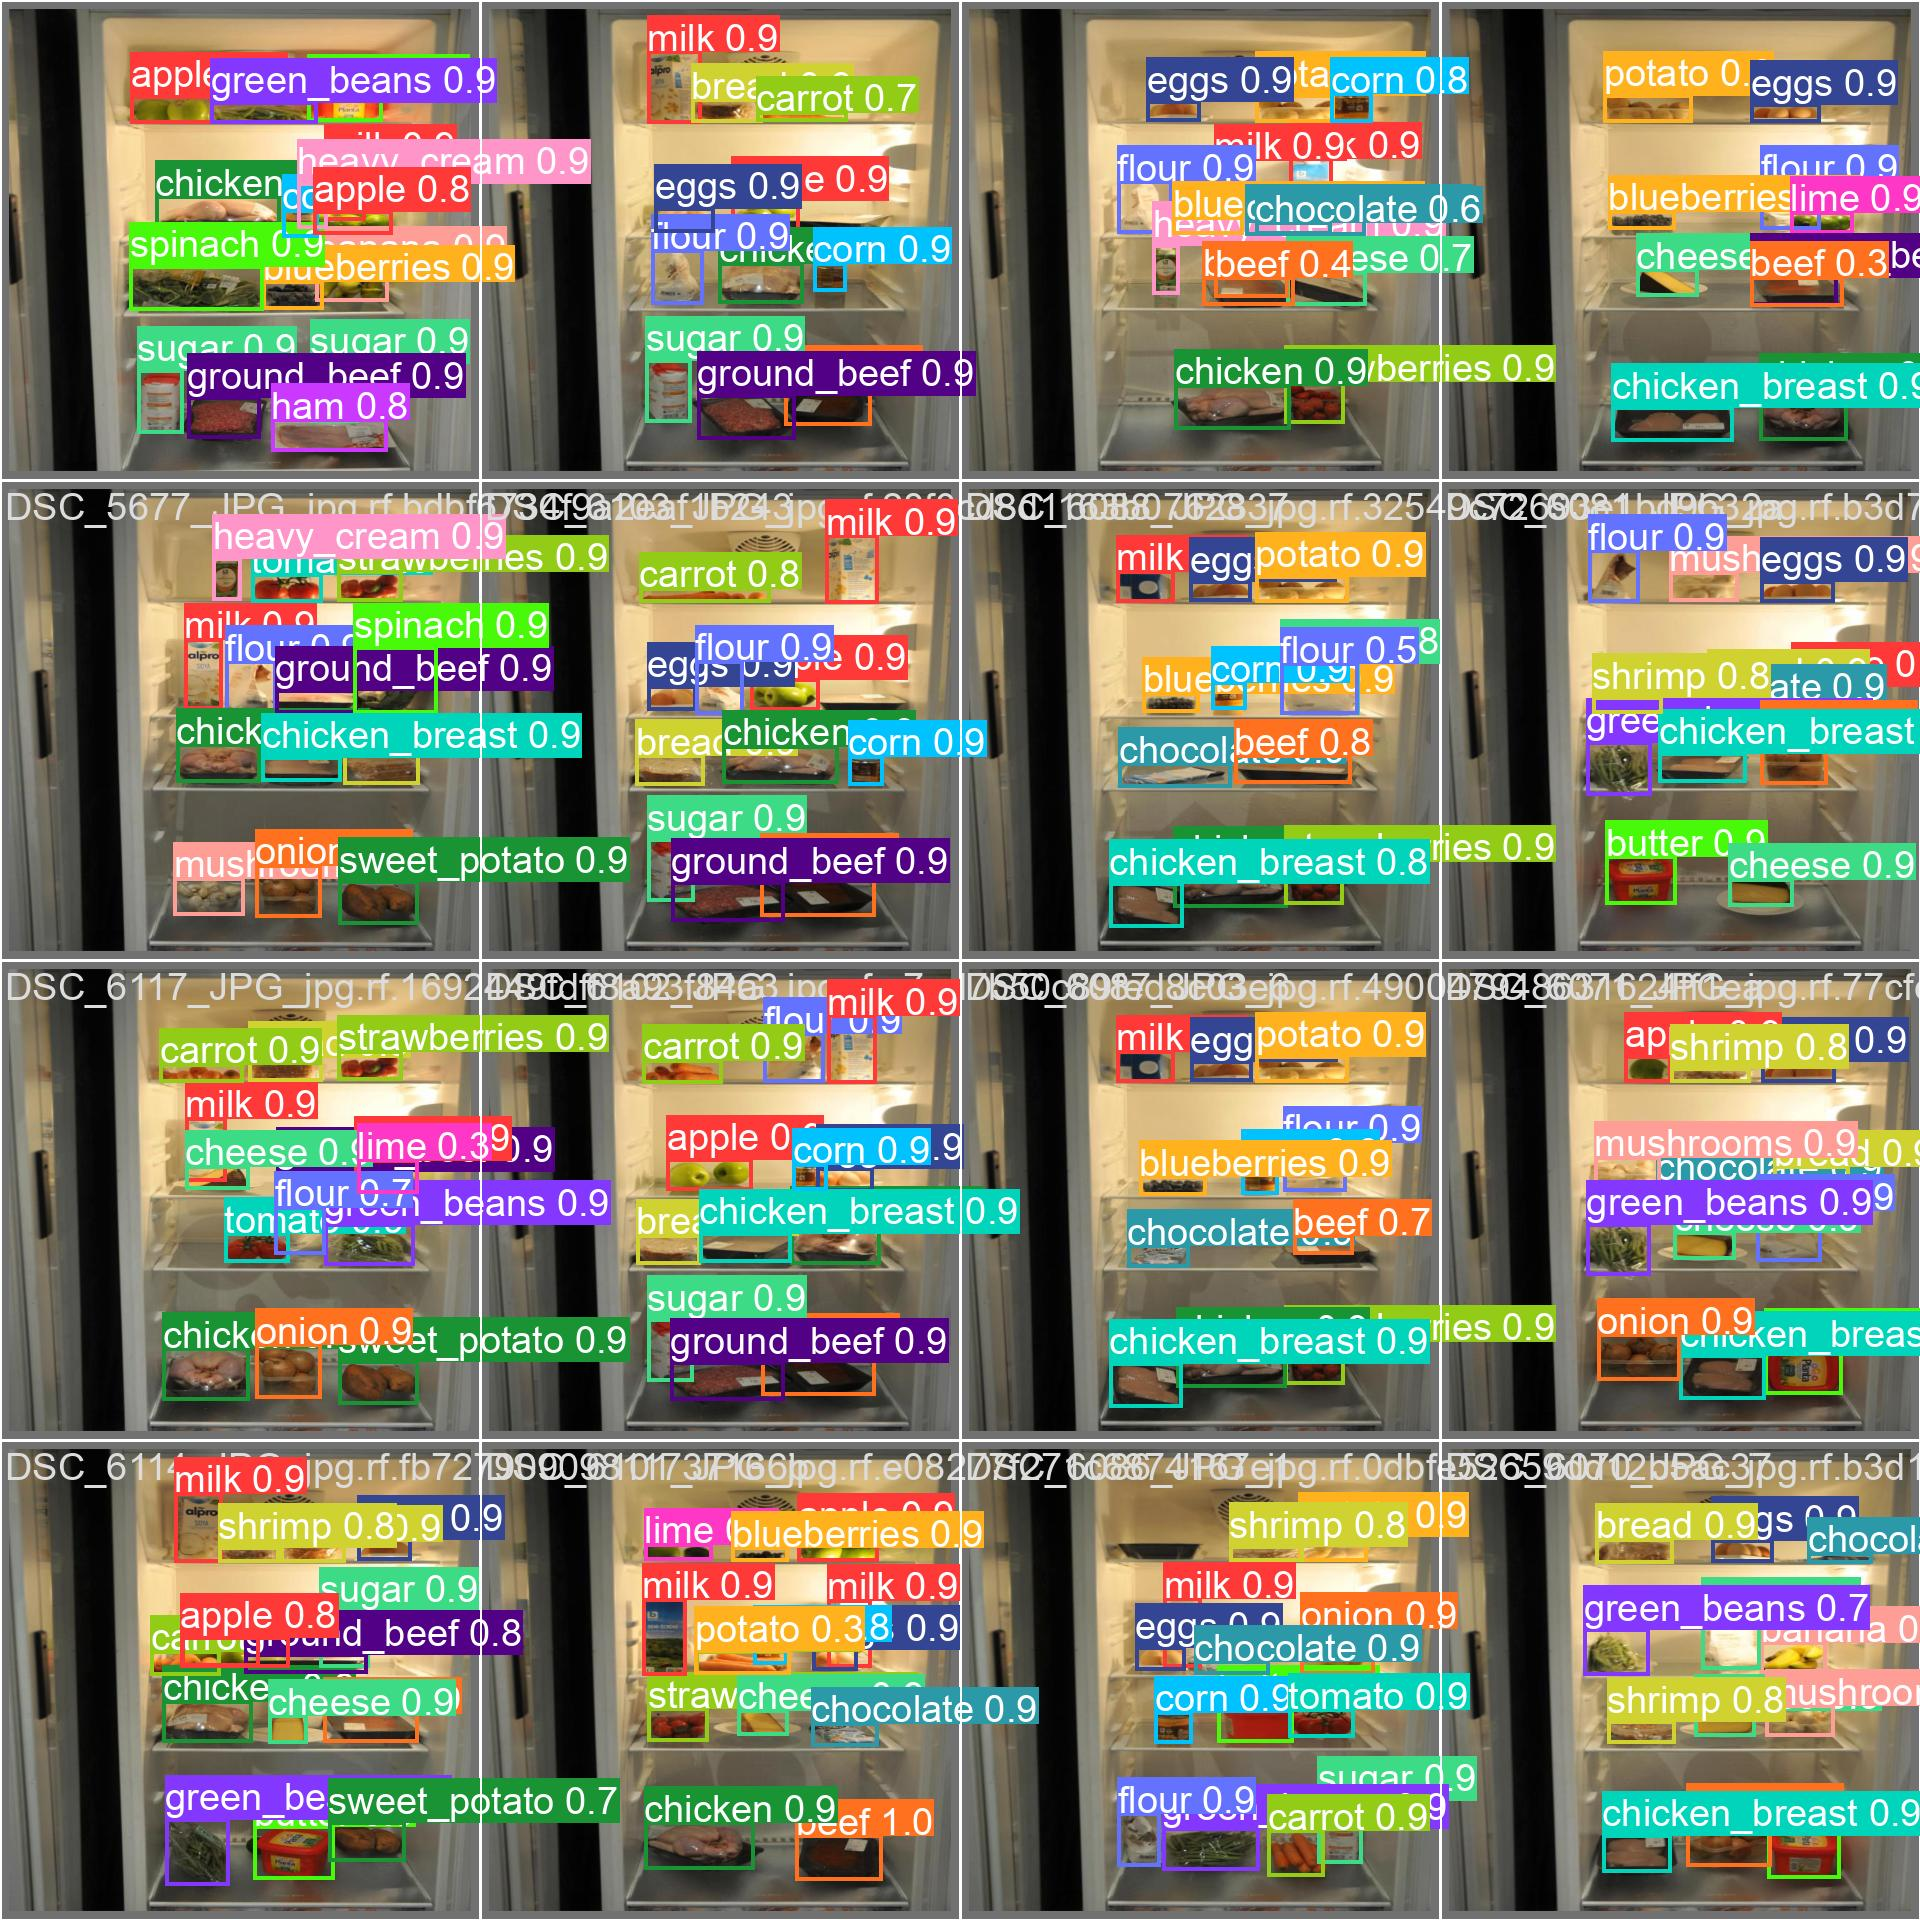

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=1200)

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data=datasets/aicook-4/data.yaml

/content
2023-11-04 15:54:43.324088: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 15:54:43.324138: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 15:54:43.324173: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 15:54:44.450636: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137194 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/aicook-4/valid/labels.cache..

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.25 source=datasets/aicook-4/test/images save=True

/content
2023-11-04 15:55:10.791459: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 15:55:10.791510: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 15:55:10.791540: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 15:55:11.937924: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11137194 parameters, 0 gradients, 28.5 GFLOPs
image 1/51 /content/datasets/aicook-4/test/images/DSC_5941_JP

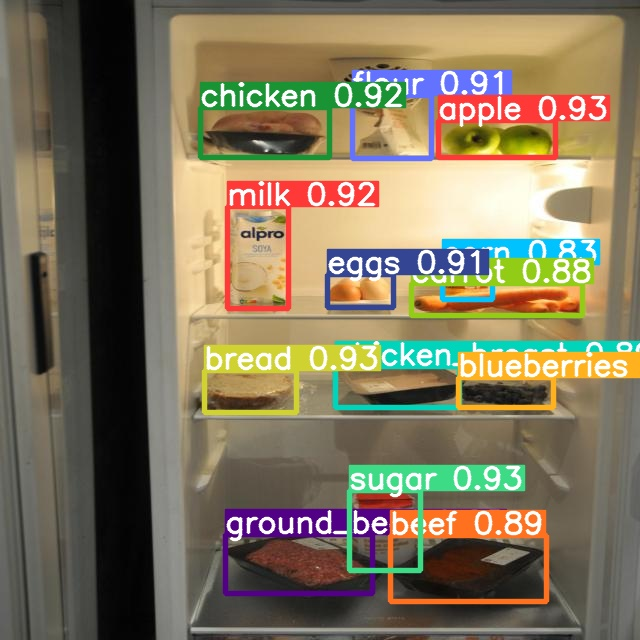

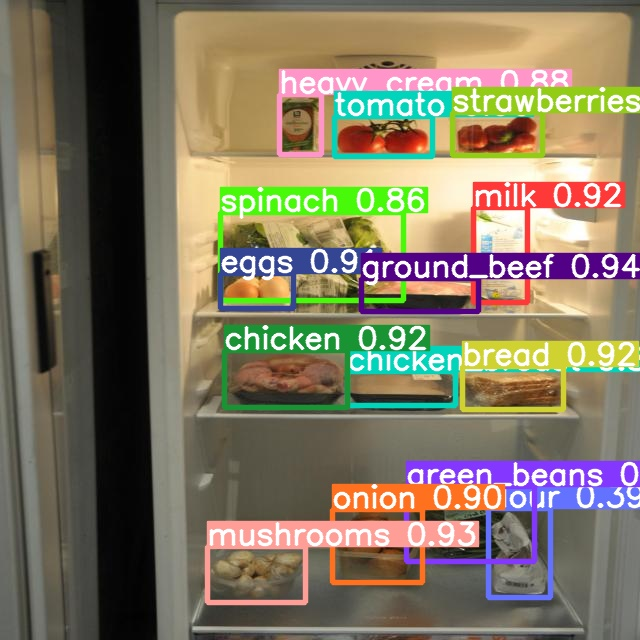

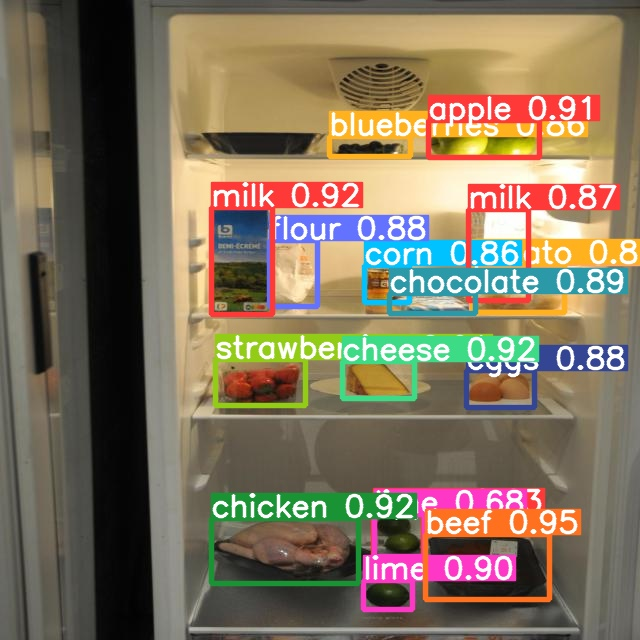

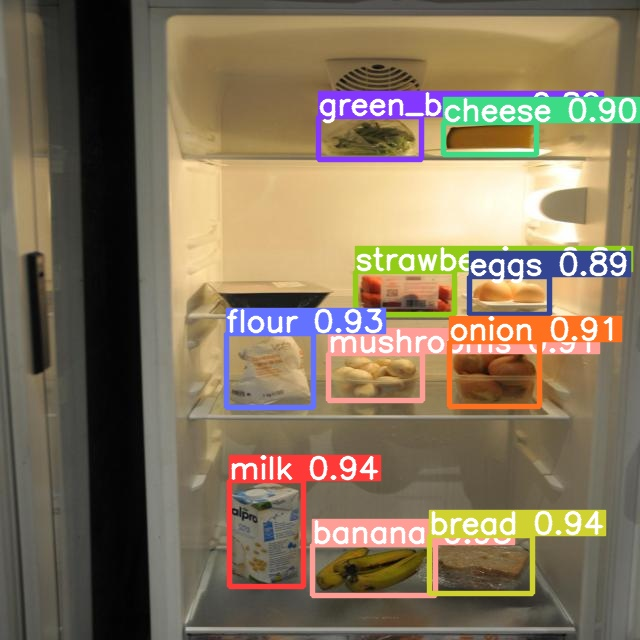

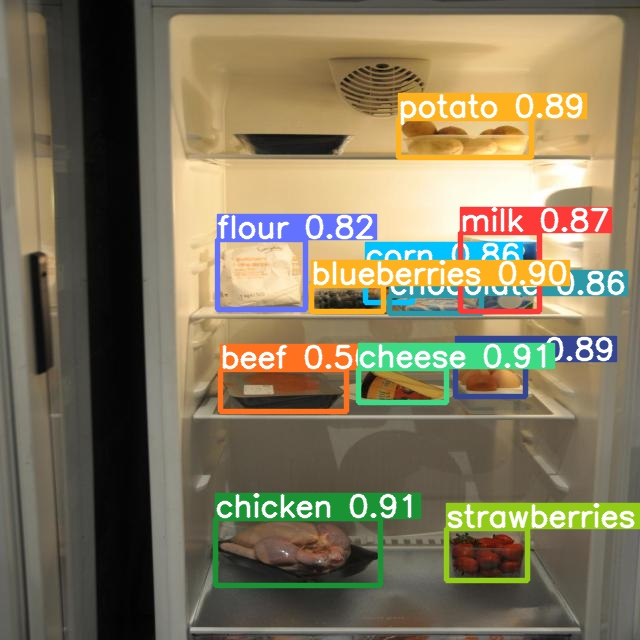

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")